In [68]:
import pandas as pd

synthetic_data = pd.read_csv('synthetic_bankChurn_single_model.csv')
real_data = pd.read_csv('/Users/julianchu/Downloads/Churn Modeling.csv')

In [69]:
import numpy as np

model_name = 'Single model'
save_directory = 'plots/'

In [70]:
display(synthetic_data.head())
display(real_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2132,15760811,Endrizzi,531,France,Male,35,7,0.00,1,1,1,157852.39,0
1,2133,15681714,Korovina,657,France,Male,35,1,118057.62,1,1,1,179541.70,0
2,2134,15659917,Mao,731,France,Male,24,7,0.00,2,0,0,191177.23,0
3,2135,15687962,Endrizzi,686,Spain,Female,40,4,0.00,1,1,0,182738.59,1
4,2136,15732970,Wang,725,Spain,Male,38,2,0.00,2,1,1,194928.01,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
synth_corr = synthetic_data.drop(columns = ['RowNumber', 'CustomerId']).corr()
real_corr = real_data.drop(columns = ['RowNumber', 'CustomerId']).corr()
display(synth_corr)
display(real_corr)

/var/folders/p6/282rtsj52x15882qy3mp5hpc0000gn/T/ipykernel_40708/405157507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  synth_corr = synthetic_data.drop(columns = ['RowNumber', 'CustomerId']).corr()
/var/folders/p6/282rtsj52x15882qy3mp5hpc0000gn/T/ipykernel_40708/405157507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  real_corr = real_data.drop(columns = ['RowNumber', 'CustomerId']).corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.031347,-0.033987,-0.033929,0.000752,-0.031237,0.009131,0.042590,-0.006450
Age,0.031347,1.000000,-0.001550,0.044932,-0.161127,0.017954,0.055063,0.014204,0.377453
Tenure,-0.033987,-0.001550,1.000000,-0.047269,-0.041831,0.058058,0.024088,0.029272,-0.023781
Balance,-0.033929,0.044932,-0.047269,1.000000,-0.389787,-0.055785,-0.070040,-0.026168,0.180487
NumOfProducts,0.000752,-0.161127,-0.041831,-0.389787,1.000000,-0.049360,-0.047362,-0.003060,-0.264797
HasCrCard,-0.031237,0.017954,0.058058,-0.055785,-0.049360,1.000000,0.235055,0.047056,-0.052071
IsActiveMember,0.009131,0.055063,0.024088,-0.070040,-0.047362,0.235055,1.000000,0.035635,-0.200165
EstimatedSalary,0.042590,0.014204,0.029272,-0.026168,-0.003060,0.047056,0.035635,1.000000,0.010639
Exited,-0.006450,0.377453,-0.023781,0.180487,-0.264797,-0.052071,-0.200165,0.010639,1.000000


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


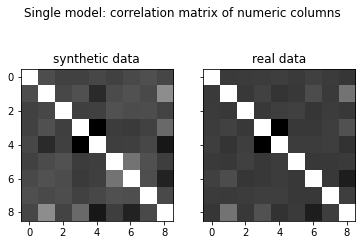

In [72]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,  sharex=True, sharey=True)

ax1.set_title('synthetic data')
ax1.imshow(synth_corr, cmap='gray')

ax2.set_title('real data')
ax2.imshow(real_corr, cmap='gray')

plt.suptitle(model_name + ': correlation matrix of numeric columns')

plt.show()

RowNumber
5029.890219560878 5000.5


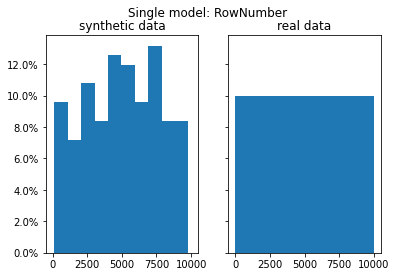

CustomerId
16115579.512974052 15690940.5694


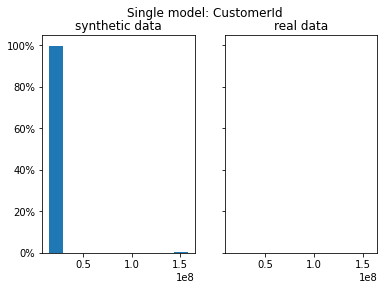

Surname
CreditScore
666.2295409181637 650.5288


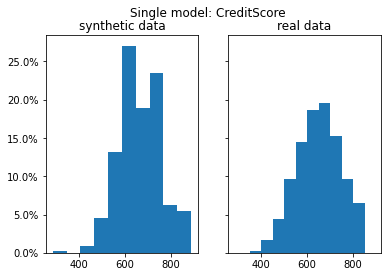

Geography


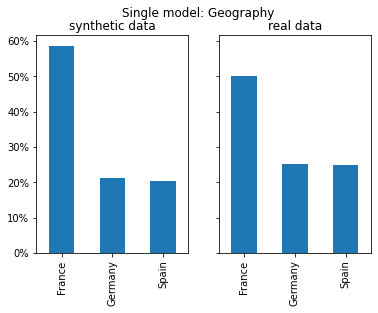

Gender


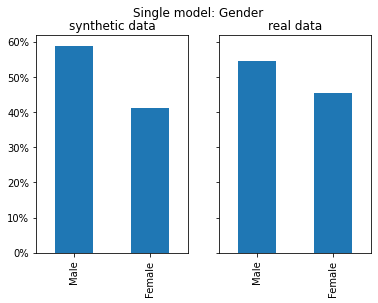

Age
37.616766467065865 38.9218


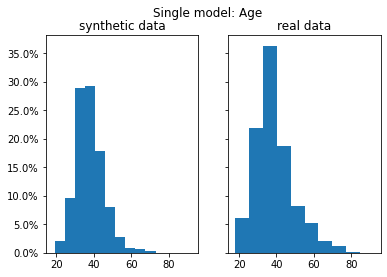

Tenure
4.802395209580839 5.0128


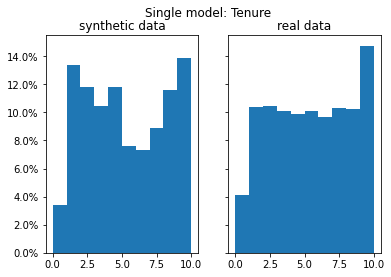

Balance
45071.05320359282 76485.889288


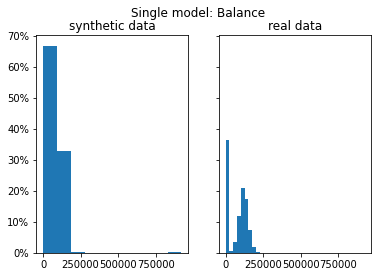

NumOfProducts
1.624750499001996 1.5302


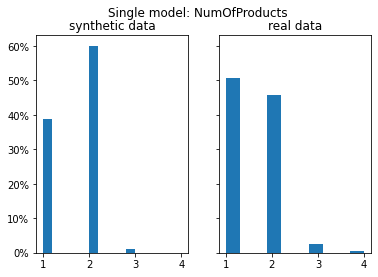

HasCrCard
0.7864271457085829 0.7055


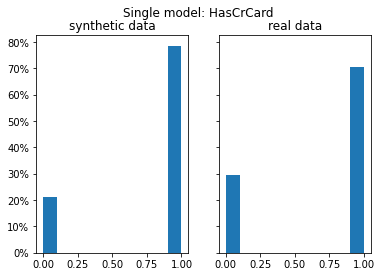

IsActiveMember
0.5558882235528942 0.5151


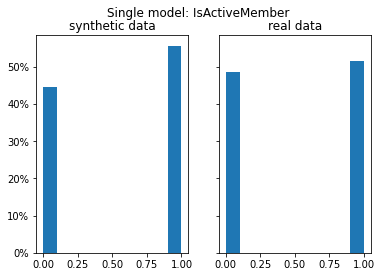

EstimatedSalary
117621.08828343314 100090.239881


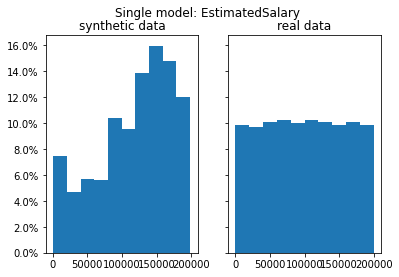

Exited
0.12574850299401197 0.2037


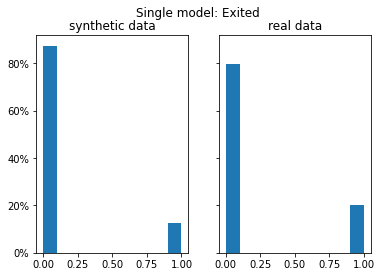

In [77]:
from matplotlib.ticker import PercentFormatter

synth_length = len(synthetic_data)
real_length = len(real_data)
for column in synthetic_data.columns:
    filename = save_directory + model_name + ': ' + column
    print(column)
    synth_col = synthetic_data[column]
    real_col = real_data[column]
    if pd.api.types.is_numeric_dtype(real_col):
        print(np.mean(synth_col), np.mean(real_col))

        f, (ax1, ax2) = plt.subplots(1, 2,  sharex=True, sharey=True)
        ax1.set_title('synthetic data')
        ax1.hist(synth_col, 10, weights=np.ones(len(synth_col)) / len(synth_col))
        
        ax2.set_title('real data')
        ax2.hist(real_col, 10, weights=np.ones(len(real_col)) / len(real_col))
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        plt.suptitle(model_name + ': ' + column)
        plt.savefig(filename,bbox_inches='tight')
        plt.show()
    else:
        if column == 'Surname': continue
        f, (ax1, ax2) = plt.subplots(1, 2,  sharex=True, sharey=True)

        synth_col.value_counts(normalize=True).plot(kind='bar', title='synthetic data', ax = ax1)
        real_col.value_counts(normalize=True).plot(kind='bar',title='real data', ax = ax2)
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        plt.suptitle(model_name + ': ' + column)
        plt.savefig(filename, dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,)
        plt.show()

In [74]:
        # print(min(synthetic_data[column]+ real_data[column]), max(synthetic_data[column]+ real_data[column]))
        # labels = range(30)#range(int(min(synthetic_data[column]+ real_data[column]) * 0.75), int(max(synthetic_data[column]+ real_data[column]) * 1.25))
        # synth_freq, synth_edges = np.histogram(synthetic_data[column], bins=30)
        # real_freq, real_edges = np.histogram(real_data[column], bins=30)
        # plt.bar(real_freq[:-1], synth_freq / synth_length,width=1.0, alpha=0.5, label='sythetic data')
        # plt.bar(real_edges[:-1], real_freq / real_length, width=1.0,alpha=0.5, label='real data')
        # plt.legend(loc='upper right')
        # plt.show()